In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('BIKE DETAILS.csv')

In [3]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [4]:
df.selling_price

,selling_price
0,175000
1,45000
2,150000
3,65000
4,20000
...,...
1056,17000
1057,16000
1058,15000
1059,12000


In [5]:
df.shape

(1061, 7)

In [6]:
df.selling_price.sort_values(ascending=False).head(5)

,selling_price
295,760000
134,750000
289,425000
13,365000
311,330000


In [7]:
df.selling_price.sort_values(ascending=False).tail(5)

,selling_price
77,7500
115,7500
567,6000
748,6000
543,5000


In [8]:
#inshight question 1 - range of selling price 760000 to 5000

In [9]:
df.selling_price.median()

45000.0

In [10]:
#inshight question 2 - the median of selling price 45000

In [11]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

<Axes: xlabel='seller_type', ylabel='count'>

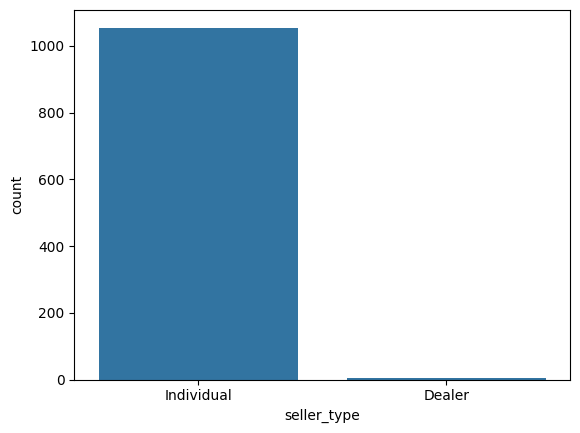

In [12]:
sns.countplot(x='seller_type',data=df)

In [13]:
#inshight of question 3 individual sellar is common

In [14]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [15]:
df.km_driven

,km_driven
0,350
1,5650
2,12000
3,23000
4,21000
...,...
1056,500000
1057,33000
1058,35000
1059,53000


In [16]:
len(df[df.km_driven>50000].name)

170

In [17]:
#inshight question 4 - 170 bikes driven more than 50000 km

In [18]:
df.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [19]:
df[df.owner=='1st owner'].km_driven.mean()

32816.583333333336

In [20]:
df[df.owner=='2nd owner'].km_driven.mean()

39288.9918699187

In [21]:
df[df.owner=='3rd owner'].km_driven.mean()

33292.181818181816

In [22]:
df[df.owner=='4th owner'].km_driven.mean()

311500.0

In [23]:
#no. 5 question 1st owner avarage km driven is 39288.9918699187 , 2nd owner avarage km driven is 39288.9918699187 ,3rd owner avg km driven is 33292.181818181816 ,4 th owner avg km driven is 311500.0

In [24]:
len(df[df.year<=2015].name)

601

In [25]:
## no 6 -601 bike from 2015 or older

In [26]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [27]:
#ex_showroom_price has 435 missing value

In [28]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [29]:
index_highest_price = df.ex_showroom_price.sort_values(ascending=False).head(1).index[0]
car_name = df.loc[index_highest_price, 'name']
print(car_name)

Harley-Davidson Street Bob


In [30]:
#highest exshowroom price is Harley-Davidson Street Bob

In [31]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [32]:
df.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [33]:
#individual sellar has 1055 bike listed and dealed has 6 bike listed

In [34]:
first_owner_df = df[df['owner'] == '1st owner']

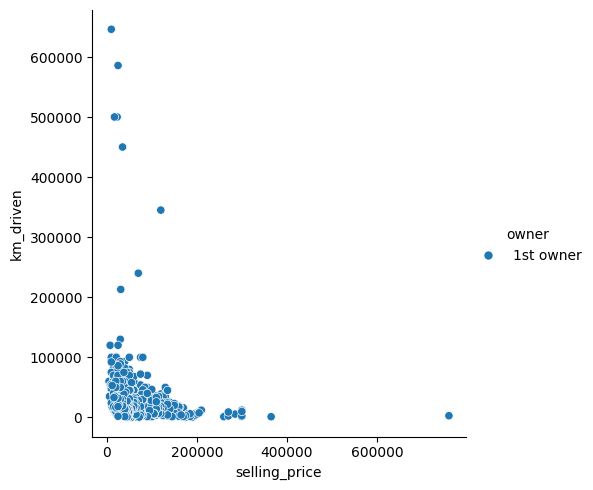

In [35]:
sns.relplot(hue='owner',x='selling_price',y='km_driven',data=first_owner_df)

In [36]:
#question no. 10-this is the ralatinship plot between selling_price and km_driven for first-owner bikes

<Axes: ylabel='km_driven'>

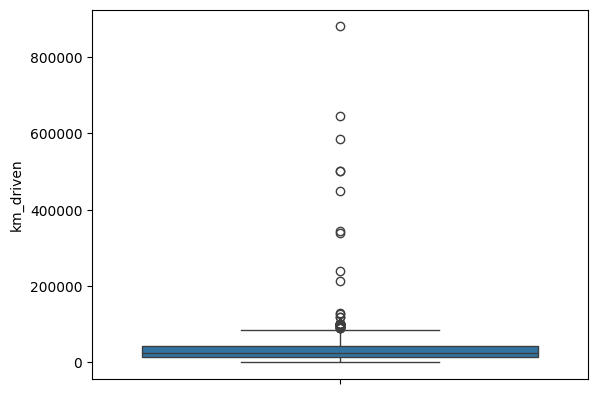

In [37]:
#question 11
sns.boxplot(y='km_driven',data=df) #before outlier removal

In [38]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

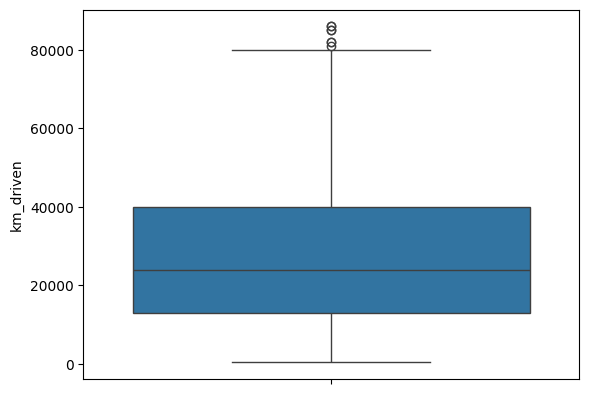

In [39]:
sns.boxplot(y='km_driven', data=df_filtered)  # After outlier removal
plt.show()

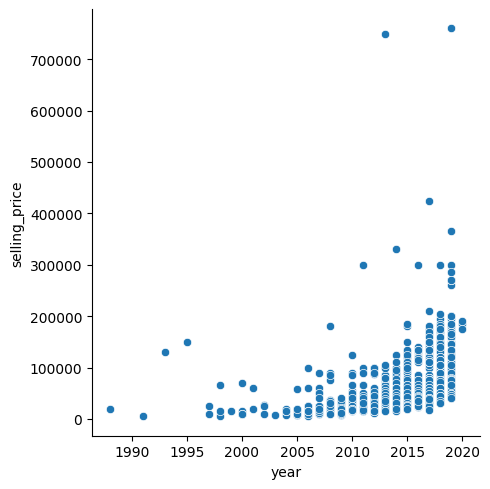

In [40]:
##question no. 12
sns.relplot(x='year',y='selling_price',data=df)

In [41]:
##question 13

In [44]:
df['bike_age']=2024-df['year']

In [45]:
df.bike_age

,bike_age
0,5
1,7
2,6
3,9
4,13
...,...
1056,14
1057,12
1058,11
1059,15


In [51]:
average_selling_price_by_age = df.groupby('bike_age')['selling_price'].mean()

In [52]:
average_selling_price_by_age

,selling_price
bike_age,
4,183333.333333
5,119689.511628
6,87660.374046
7,78894.736842
8,58469.018692
9,56500.000000
10,48668.131868
11,51136.986301
12,35748.400000


In [54]:
new_bike_price = average_selling_price_by_age.get(0, df['selling_price'].mean())

In [55]:
depreciation = new_bike_price - average_selling_price_by_age

In [57]:
depreciation

,selling_price
bike_age,
4,-123695.181590
5,-60051.359884
6,-28022.222302
7,-19256.585098
8,1169.133052
9,3138.151744
10,10970.019876
11,8501.165442
12,23889.751744


In [58]:
#this is depriciation

In [90]:
##question 14
selling_price_mean=df.selling_price.mean()

In [84]:
over_average_price = df[df.selling_price > selling_price_mean][['name','selling_price']]

In [85]:
over_average_price

,name,selling_price
0,Royal Enfield Classic 350,175000
2,Royal Enfield Classic Gunmetal Grey,150000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000
6,Honda CB Hornet 160R,78500
7,Royal Enfield Bullet 350 [2007-2011],180000
...,...,...
1001,Bajaj Avenger 150 street,60000
1002,Yamaha FZ v 2.0,60000
1003,Yamaha FZ v 2.0,60000
1004,Bajaj Pulsar NS 200,60000


In [86]:
#this bike are over average price year

<Axes: >

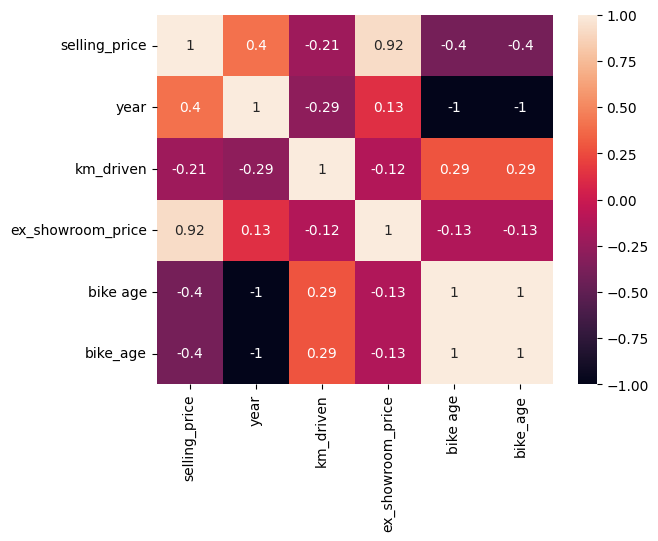

In [91]:
##question 15
corr=df.corr(numeric_only = True)
plt.figure()
sns.heatmap(corr,annot=True)